In [25]:
import re
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Data preparation and exploration

In [27]:
filename = "emotion_dataset.txt"

# Read the file
with open(filename, 'r') as file:
    lines = file.readlines()  

# Each line as a json dictionary
dataset = [json.loads(line) for line in lines]

df = pd.DataFrame(dataset)

# Mostrar las primeras filas del DataFrame
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the firepl...,2
4,i am feeling grouchy,3


In [28]:
# Check missing values
print("\nMissing values per colummn:")
print(df.isnull().sum())


Missing values per colummn:
text     0
label    0
dtype: int64


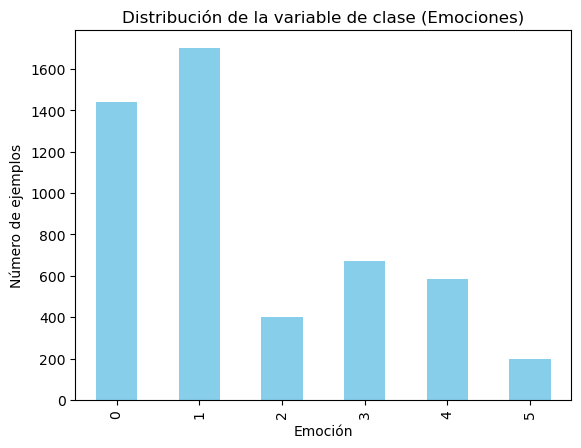

In [29]:
# Data distribution
class_distribution = df['label'].value_counts().sort_index()

class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribución de la variable de clase (Emociones)')
plt.xlabel('Emoción')
plt.ylabel('Número de ejemplos')
plt.show()


Stadistics:
count    5000.000000
mean       97.761600
std        56.732182
min        11.000000
25%        53.000000
50%        86.000000
75%       130.000000
max       299.000000
Name: text_length, dtype: float64


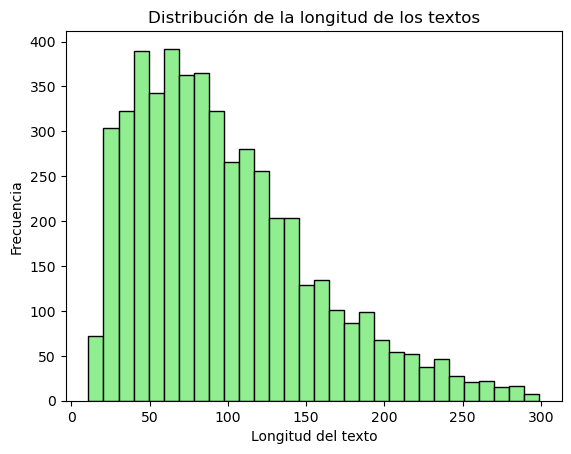

In [30]:
# Text lengths
df['text_length'] = df['text'].apply(len)

print("\nStadistics:")
print(df['text_length'].describe())

plt.hist(df['text_length'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribución de la longitud de los textos')
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.show()


In [31]:
X = df["text"]
y = df["label"]

#temporal variable to divide in test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=123)

#test and validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Sizings
print(f"Training data size: {len(X_train)}")
print(f"Validation data size: {len(X_val)}")
print(f"Test data size: {len(X_test)}")


Training data size: 3500
Validation data size: 750
Test data size: 750


In [32]:
# Vectorizer TF-IDF. Text format
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

print(f"Training data TF-IDF: {X_train}")
print(f"Validation data TF-IDF: {X_val}")
print(f"Test data TF-IDF: {X_test.shape}")

Training data TF-IDF:   (0, 1778)	0.2821043748153612
  (0, 2372)	0.43387292622923596
  (0, 2447)	0.4100000436470819
  (0, 4304)	0.2431867516022269
  (0, 4612)	0.3839859151680079
  (0, 554)	0.42479687749930767
  (0, 2305)	0.2380316557283747
  (0, 2569)	0.33718221446892654
  (0, 1775)	0.08175015954924543
  (1, 4919)	0.3508976552544649
  (1, 4356)	0.31007989138816305
  (1, 2367)	0.2751394000356691
  (1, 2177)	0.23728799083068547
  (1, 1737)	0.31201464009188984
  (1, 4966)	0.6026780281699208
  (1, 2487)	0.25766307369578145
  (1, 2871)	0.316108946389982
  (1, 1775)	0.1477326965995493
  (2, 2574)	0.28339762772087845
  (2, 39)	0.31667663917925953
  (2, 3163)	0.4065446035019442
  (2, 2145)	0.34639761834142785
  (2, 4602)	0.26517777510768303
  (2, 4188)	0.3870776297377217
  (2, 3627)	0.34639761834142785
  :	:
  (3497, 4304)	0.1988996942628473
  (3497, 1775)	0.06686253109248326
  (3498, 550)	0.3501640727034507
  (3498, 1482)	0.29373960247748243
  (3498, 2821)	0.3319019157787485
  (3498, 3625)	0.

In [33]:
# Labels format
print(f"Tipo de y_train: {type(y_train.iloc[0])}")

y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)


Tipo de y_train: <class 'numpy.int64'>


# Basic machine learning

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
# Majority classifier
predicted_labels = [y_train.value_counts().idxmax()]*len(y_test)
print("Majority classifier Accuracy:")
MC_accuracy_score = accuracy_score(y_test, predicted_labels)
print(MC_accuracy_score)
print('Classification Report:')
print(classification_report(y_test, predicted_labels))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predicted_labels))

Majority classifier Accuracy:
0.3373333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       219
           1       0.34      1.00      0.50       253
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00       107
           4       0.00      0.00      0.00        97
           5       0.00      0.00      0.00        24

    accuracy                           0.34       750
   macro avg       0.06      0.17      0.08       750
weighted avg       0.11      0.34      0.17       750

Confusion Matrix:
[[  0 219   0   0   0   0]
 [  0 253   0   0   0   0]
 [  0  50   0   0   0   0]
 [  0 107   0   0   0   0]
 [  0  97   0   0   0   0]
 [  0  24   0   0   0   0]]


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predicted_knn = knn.predict(X_test)
print("KNN Accuracy:")
KNN_accuracy_score = accuracy_score(y_test, predicted_knn)
print(KNN_accuracy_score)
print('Classification Report:')
print(classification_report(y_test, predicted_knn))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predicted_knn))

KNN Accuracy:
0.6866666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       219
           1       0.63      0.90      0.74       253
           2       0.67      0.40      0.50        50
           3       0.78      0.50      0.61       107
           4       0.85      0.40      0.55        97
           5       0.50      0.21      0.29        24

    accuracy                           0.69       750
   macro avg       0.69      0.53      0.57       750
weighted avg       0.71      0.69      0.67       750

Confusion Matrix:
[[169  40   1   5   3   1]
 [ 19 228   4   1   1   0]
 [  6  23  20   1   0   0]
 [ 18  34   1  54   0   0]
 [ 19  24   4   7  39   4]
 [  2  13   0   1   3   5]]


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [37]:
# SVM
svm = SVC(C=100)
svm.fit(X_train, y_train)
predicted_svm = svm.predict(X_test)
print("SVM Accuracy:")
SVM_accuracy_score = accuracy_score(y_test, predicted_svm)
print(SVM_accuracy_score)
print('Classification Report:')
print(classification_report(y_test, predicted_svm))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predicted_svm))


SVM Accuracy:
0.792
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       219
           1       0.75      0.94      0.83       253
           2       0.75      0.54      0.63        50
           3       0.94      0.67      0.78       107
           4       0.83      0.55      0.66        97
           5       0.62      0.21      0.31        24

    accuracy                           0.79       750
   macro avg       0.78      0.64      0.68       750
weighted avg       0.80      0.79      0.78       750

Confusion Matrix:
[[200  11   1   2   5   0]
 [  9 237   5   0   2   0]
 [  6  17  27   0   0   0]
 [ 15  18   2  72   0   0]
 [ 16  21   1   3  53   3]
 [  2  13   0   0   4   5]]


In [38]:
# Decision Trees
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=25)
dt.fit(X_train, y_train)
predicted_dt = dt.predict(X_test)
print("Decision Tree Accuracy:")
DT_accuracy_score = accuracy_score(y_test, predicted_dt)
print(DT_accuracy_score)
print('Classification Report:')
print(classification_report(y_test, predicted_dt))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predicted_dt))

Decision Tree Accuracy:
0.36933333333333335
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       219
           1       0.35      1.00      0.52       253
           2       0.00      0.00      0.00        50
           3       0.86      0.06      0.11       107
           4       0.86      0.12      0.22        97
           5       1.00      0.29      0.45        24

    accuracy                           0.37       750
   macro avg       0.51      0.24      0.22       750
weighted avg       0.38      0.37      0.23       750

Confusion Matrix:
[[  0 217   0   1   1   0]
 [  0 252   0   0   1   0]
 [  0  50   0   0   0   0]
 [  0 101   0   6   0   0]
 [  0  85   0   0  12   0]
 [  0  17   0   0   0   7]]


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# Random Forest
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
predicted_rf = rf.predict(X_test)
print("Random Forest Accuracy:")
RF_accuracy_score = accuracy_score(y_test, predicted_rf)
print(RF_accuracy_score)
print('Classification Report:')
print(classification_report(y_test, predicted_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predicted_rf))

Random Forest Accuracy:
0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       219
           1       0.81      0.91      0.85       253
           2       0.79      0.74      0.76        50
           3       0.88      0.76      0.81       107
           4       0.81      0.75      0.78        97
           5       0.79      0.79      0.79        24

    accuracy                           0.83       750
   macro avg       0.83      0.80      0.81       750
weighted avg       0.84      0.83      0.83       750

Confusion Matrix:
[[186  21   0   5   6   1]
 [  8 229   7   4   5   0]
 [  2  11  37   0   0   0]
 [  9  12   1  81   3   1]
 [  8   9   2   2  73   3]
 [  0   2   0   0   3  19]]


In [40]:
# Bagging
bc = BaggingClassifier()
bc.fit(X_train, y_train)
predicted_bc = bc.predict(X_test)
print("Bagging Accuracy:")
Bagging_accuracy_score = accuracy_score(y_test, predicted_bc)
print(Bagging_accuracy_score)
print('Classification Report:')
print(classification_report(y_test, predicted_bc))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predicted_bc))

Bagging Accuracy:
0.836
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       219
           1       0.86      0.87      0.86       253
           2       0.69      0.82      0.75        50
           3       0.86      0.76      0.81       107
           4       0.79      0.73      0.76        97
           5       0.70      0.67      0.68        24

    accuracy                           0.84       750
   macro avg       0.79      0.79      0.79       750
weighted avg       0.84      0.84      0.84       750

Confusion Matrix:
[[199   9   0   4   6   1]
 [ 11 219  13   5   5   0]
 [  4   4  41   1   0   0]
 [  8  10   3  81   4   1]
 [  6  10   2   3  71   5]
 [  0   4   0   0   4  16]]


In [41]:
# Gradiant Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
predicted_gb = gb.predict(X_test)
print("Gradiant Boosting Accuracy:")
GB_accuracy_score = accuracy_score(y_test, predicted_gb)
print(GB_accuracy_score)
print('Classification Report:')
print(classification_report(y_test, predicted_gb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predicted_gb))

Gradiant Boosting Accuracy:
0.792
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       219
           1       0.69      0.90      0.78       253
           2       0.67      0.80      0.73        50
           3       0.89      0.73      0.80       107
           4       0.87      0.74      0.80        97
           5       0.80      0.67      0.73        24

    accuracy                           0.79       750
   macro avg       0.81      0.76      0.78       750
weighted avg       0.82      0.79      0.79       750

Confusion Matrix:
[[161  48   0   5   4   1]
 [  4 227  15   3   4   0]
 [  0  10  40   0   0   0]
 [  5  22   2  78   0   0]
 [  1  16   3   2  72   3]
 [  0   5   0   0   3  16]]


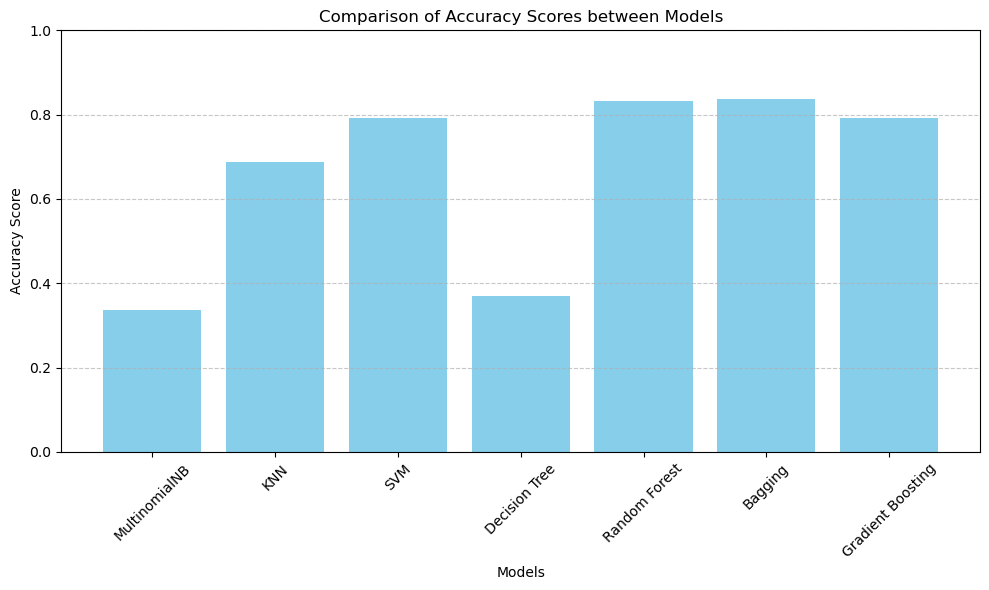

In [42]:
import matplotlib.pyplot as plt

model_names = [
    'MultinomialNB', 
    'KNN', 
    'SVM', 
    'Decision Tree', 
    'Random Forest', 
    'Bagging', 
    'Gradient Boosting'
]

# Accuracy scores for each model
accuracy_scores = [
    MC_accuracy_score, 
    KNN_accuracy_score, 
    SVM_accuracy_score, 
    DT_accuracy_score, 
    RF_accuracy_score, 
    Bagging_accuracy_score, 
    GB_accuracy_score
]


plt.figure(figsize=(10, 8))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.title('Comparison of Accuracy Scores between Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Cross validation and Hyperparameter Tuning
We will implement cross validation and Hyperparameter tuning for selected base models which already show promissing results (hight accuracy) so:  
KNN,  
Random Forest,  
Bagging

In [43]:
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [44]:
# Cross-validation implementation and K Hyperparameter tuning for KNN

# Create a copy of training data
X_CV = X_train.copy()
y_CV = y_train.copy()

# Define the number of folds
folds = 3

# Initialize variables for storing evaluation results and overall scores
eval_core = []
overall_scores = []

# We will check K in the range from 1 to 10
for neigh in range(1, 11):

    # Initialize variables to store fold-specific evaluation metrics
    fold_eval = []

    # Initialize k-fold cross-validation
    skf = StratifiedKFold(n_splits=folds, shuffle=False)

    for i, (train_index, val_index) in enumerate(skf.split(X_CV, y_CV)):
        # Select data from train and val based on fold indices
        X_CV_train, X_CV_val = X_CV[train_index], X_CV[val_index]
        y_CV_train, y_CV_val = y_CV.iloc[train_index], y_CV.iloc[val_index]

        # Train a KNN classifier with the given parameter k
        knn = KNeighborsClassifier(n_neighbors=neigh)
        knn.fit(X_CV_train, y_CV_train)

        # Predict on the val set
        y_CV_pred = knn.predict(X_CV_val)

        # Compute the accuracy metric for this fold
        accuracy = accuracy_score(y_CV_val, y_CV_pred)
        fold_eval.append(accuracy)

    # Calculate the mean performance across all folds for this k
    mean_accuracy = np.mean(fold_eval)
    print(f'n_neighbours_{neigh}:', mean_accuracy)

    # Append the mean accuracy to the overall scores
    overall_scores.append(mean_accuracy)

# Diagnostic
print('Overall scores:', overall_scores)

# Find the best performing k based on the highest accuracy
best_k = np.argmax(overall_scores) + 1  # Add 1 to convert to 1-based index
print("Best K for KNN:", best_k)

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

n_neighbours_1: 0.502043278004863


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

n_neighbours_2: 0.548593565278825


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

n_neighbours_3: 0.6354371674253326


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

n_neighbours_4: 0.6582914560554373


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

n_neighbours_5: 0.6691472125337382


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

n_neighbours_6: 0.6834339906804378


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

n_neighbours_7: 0.6934313793216641


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

n_neighbours_8: 0.6854314596711647


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

n_neighbours_9: 0.6925737463885594


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

n_neighbours_10: 0.6925725215486093
Overall scores: [0.502043278004863, 0.548593565278825, 0.6354371674253326, 0.6582914560554373, 0.6691472125337382, 0.6834339906804378, 0.6934313793216641, 0.6854314596711647, 0.6925737463885594, 0.6925725215486093]
Best K for KNN: 7


c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
# Random Forest Hyperparameter tuning using Grid Search with cross validation throught gridsearch Object

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 20, 50],  # Adjust the range as needed
    'min_samples_split': [10, 30],
    'min_samples_leaf': [1, 10],    
    'max_features': ['sqrt', 'log2', None]
}

# Create a grid search object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Random Forest classifier with the best hyperparameters
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Make predictions on your test data
predicted_rf = best_rf.predict(X_val)

# Calculate the accuracy of the tuned Random Forest
accuracy_rf = accuracy_score(y_val, predicted_rf)
print("Tuned Decision Tree Accuracy:", accuracy_rf)
print("Best Hyperparameters:", best_params)

In [ ]:
# Final evaluation
predicted_test = best_rf.predict(X_test)
accuracy_test = accuracy_score(y_test, predicted_test)
print("Accuracy en conjunto de prueba:", accuracy_test)
print("Best Hyperparameters:", best_params)

In [ ]:
# Hyperparameter tuning for Bagging using Grid Search with cross validation
param_grid = {
              'n_estimators': [10, 20, 30],
              'max_samples': [1, 2, 3],
              'max_features': [1, 2, 3],
              'bootstrap': [True, False],
              'bootstrap_features': [True, False],
              'warm_start': [True, False]
}

bc = BaggingClassifier()

grid_search = GridSearchCV(bc, param_grid, cv=3)
grid_search.fit(X_train, y_train)
best_bc = grid_search.best_estimator_
predicted_best_bc = best_bc.predict(X_val)
accuracy_best_bc = accuracy_score(y_val, predicted_best_bc)
print("Best Bagging Accuracy:", accuracy_best_bc)
print("Best Hyperparameters:", grid_search.best_params_)

Best Bagging Accuracy: 0.292
Best Hyperparameters: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 1, 'max_samples': 1, 'n_estimators': 10, 'warm_start': True}


c:\Users\milan\miniconda3\envs\intelsys\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# Final evaluation
predicted_test = best_bc.predict(X_test)
accuracy_test = accuracy_score(y_test, predicted_test)
print("Accuracy en conjunto de prueba:", accuracy_test)